In [1]:
import os
import sys
os.chdir("C:/Users/nassa/OneDrive/Desktop/Git_Repos/ChE4230_Project/ChE4230/testing")
os.chdir("../")
os.getcwd()

'C:\\Users\\nassa\\OneDrive\\Desktop\\Git_Repos\\ChE4230_Project\\ChE4230'

In [2]:
import pandas as pd
import numpy as np
from source.data_preprocess import DataProcessing
from sklearn.preprocessing import StandardScaler
from source.DR_methods import DR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from source.Clustering import Clustering

c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = DataProcessing().load_data("../ChE4230/data/RawData.xlsx")
data_labels = pd.read_excel("../ChE4230/data/RawData_Label.xlsx").to_numpy()

   Unnamed: 0    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0           1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1           2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2           3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3           4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4           5  0.270939  3636.329271  4460.409756  9.277992  32.424754   

      XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...       XMV3       XMV4  \
0  47.559754  2798.975799  64.995825  122.898796  ...  26.662173  60.482854   
1  47.374855  2800.296214  65.091251  122.877519  ...  26.689544  60.524644   
2  47.817088  2802.647777  64.812363  122.916165  ...  26.705507  60.546193   
3  47.869249  2803.693084  64.205417  122.892493  ...  26.768653  60.568588   
4  47.509322  2804.787223  64.598623  122.890514  ...  26.396773  60.637598   

   XMV5       XMV6       XMV7       XMV8  XMV9      XMV10      XMV11  XMV12  
0 

In [4]:
x_trainV, x_test, y_trainV, y_test = train_test_split(data,data_labels, test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_trainV,y_trainV,test_size = 0.2, random_state=42)

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)

train_scaled = scaler.transform(x_train)
test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'First Two Principle Components')

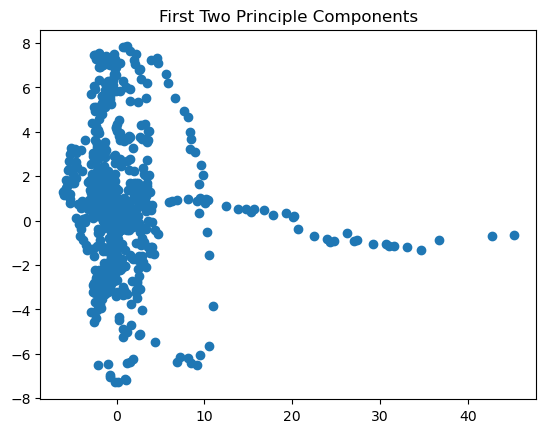

In [6]:
PCA = DR().dPCA(n = 2, data = train_scaled)
plt.scatter(PCA[:,0],PCA[:,1])
plt.title("First Two Principle Components")

c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


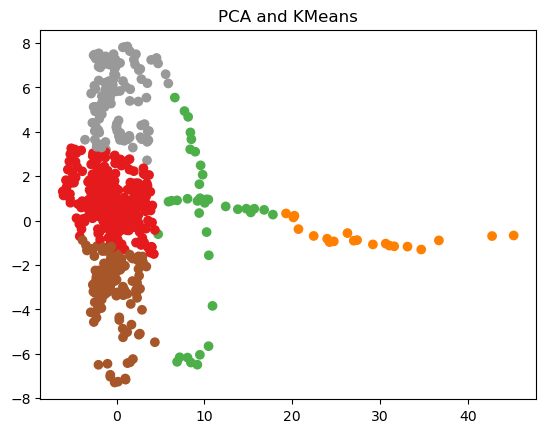

In [7]:
kmean = Clustering().dKmeans(n = 5, data = PCA)
plt.scatter(PCA[:,0], PCA[:,1],c=kmean.labels_, cmap = "Set1")
plt.title("PCA and KMeans")
plt.show()

Looks pretty bad

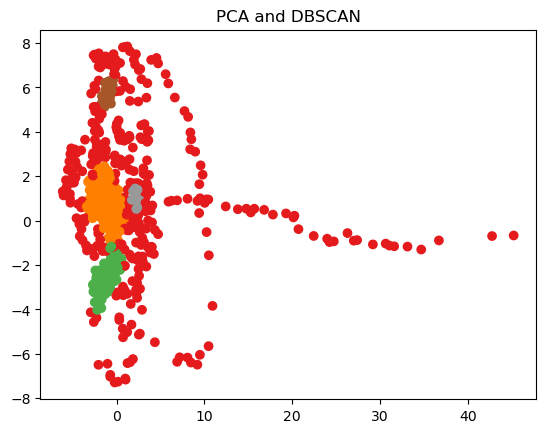

In [8]:
dbscan = Clustering.dDBSCAN(ep = .5, min_sample = 15, data = PCA)
plt.scatter(PCA[:,0], PCA[:,1],c=dbscan.labels_, cmap = "Set1")
plt.title("PCA and DBSCAN")
plt.show()

Wow. Looks really bad

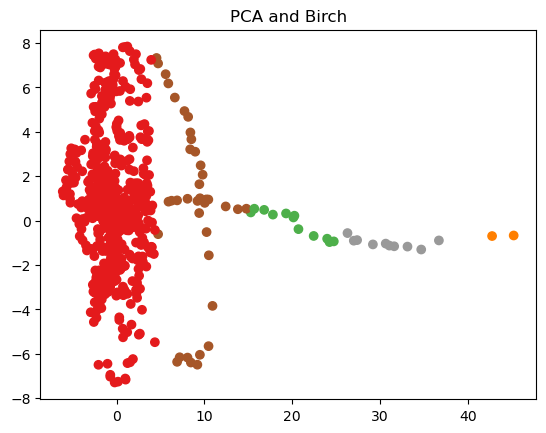

In [9]:
birch = Clustering.dBirch(branching_factor = 50, n_clusters = 5, threshold = 5, data = PCA)
plt.scatter(PCA[:,0], PCA[:,1],c=birch.labels_, cmap = "Set1")
plt.title("PCA and Birch")
plt.show()

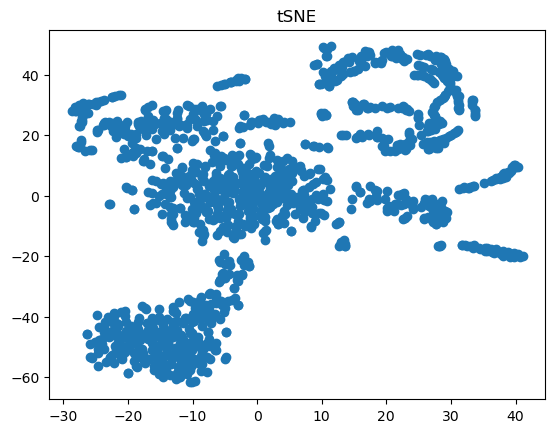

In [10]:
tSNE = DR().dtSNE(n = 2, data = train_scaled)
plt.scatter(tSNE[:,0], tSNE[:,1])
plt.title("tSNE")
plt.show()

c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


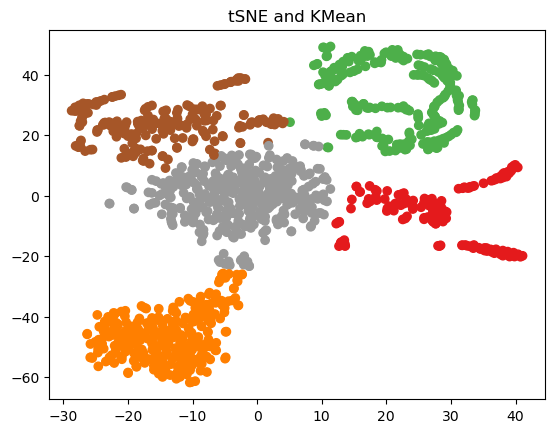

In [11]:
kmean2 = Clustering.dKmeans(self = Clustering, n = 5, data = tSNE)
plt.scatter(tSNE[:,0], tSNE[:,1],c=kmean2.labels_, cmap = "Set1")
plt.title("tSNE and KMean")
plt.show()

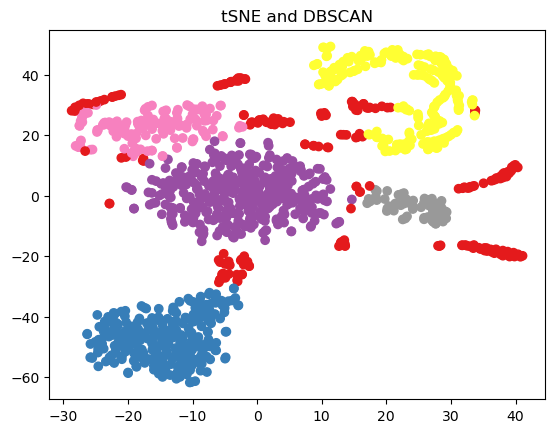

In [12]:
dbscan2 = Clustering.dDBSCAN(ep = 6, min_sample = 40, data = tSNE)
plt.scatter(tSNE[:,0], tSNE[:,1],c=dbscan2.labels_, cmap = "Set1")
plt.title("tSNE and DBSCAN")
plt.show()

c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


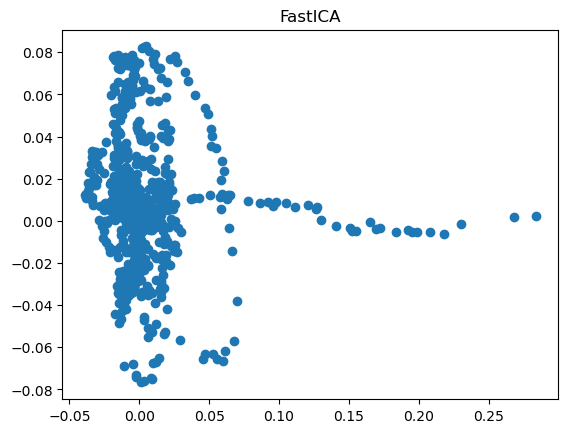

In [13]:
ica = DR.dFastICA(self = DR, n = 2, data = train_scaled)
plt.scatter(ica[:,1], ica[:,0])
plt.title("FastICA")
plt.show()

Looks just like PCA. Not gonna Deal with it much

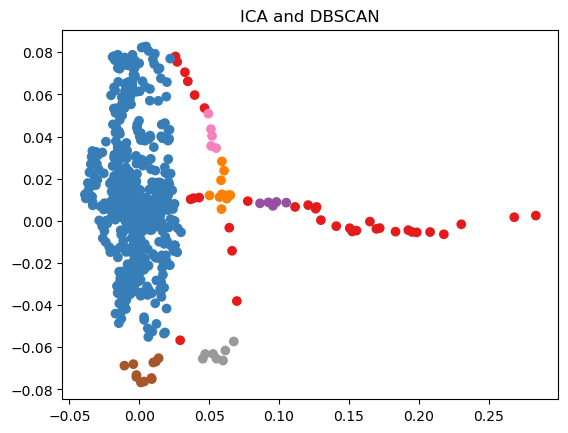

In [14]:
dbscan3 = Clustering.dDBSCAN(ep = .01, min_sample = 5, data = ica)
plt.scatter(ica[:,1], ica[:,0],c=dbscan3.labels_, cmap = "Set1")
plt.title("ICA and DBSCAN")
plt.show()

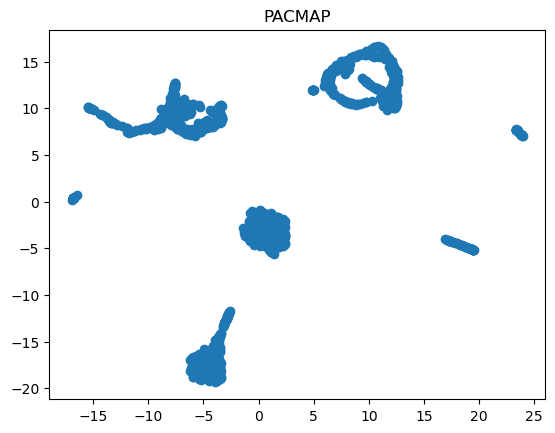

In [15]:
pacmap = DR.dPacMap(self = DR, n = 2, data = train_scaled)
plt.scatter(pacmap[:,0], pacmap[:,1])
plt.title("PACMAP")
plt.show()

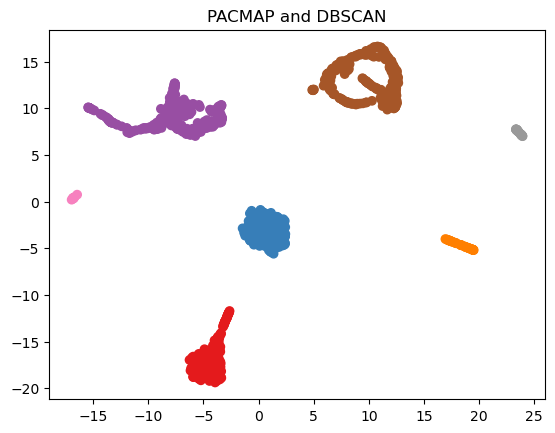

In [16]:
dbscan4 = Clustering.dDBSCAN(ep = 4, min_sample = 5, data = pacmap)
plt.scatter(pacmap[:,0], pacmap[:,1],c=dbscan4.labels_, cmap = "Set1")
plt.title("PACMAP and DBSCAN")
plt.show()

c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


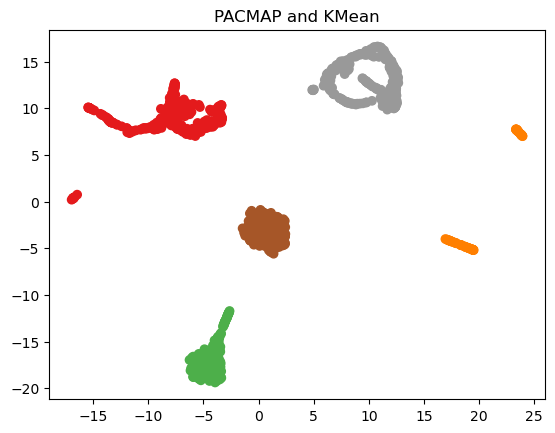

In [17]:
kmean3 = Clustering.dKmeans(self = Clustering, n = 5, data = pacmap)
plt.scatter(pacmap[:,0], pacmap[:,1],c=kmean3.labels_, cmap = "Set1")
plt.title("PACMAP and KMean")
plt.show()

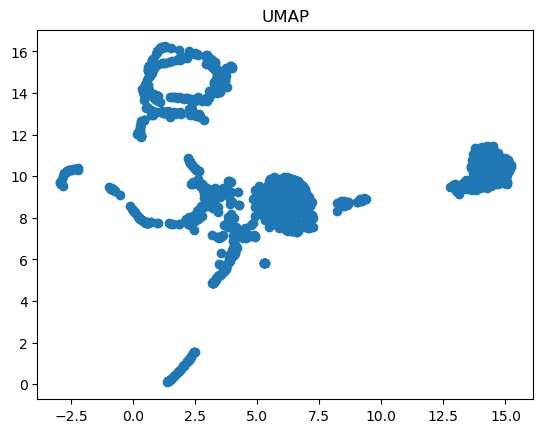

In [22]:
umap = DR.dumap(self = DR, data = train_scaled)
plt.scatter(umap[:,0], umap[:,1])
plt.title("UMAP")
plt.show()

c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nassa\anaconda3\envs\ChE4230\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


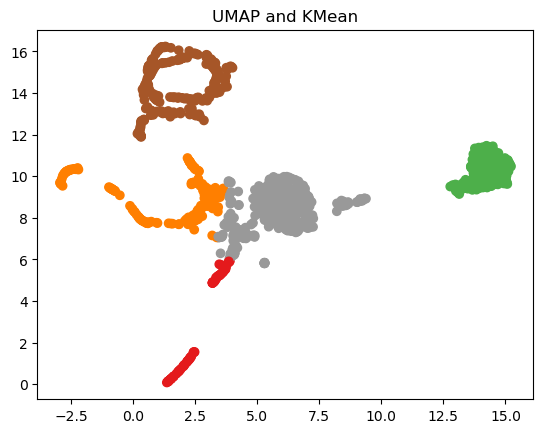

In [26]:
kmean4 = Clustering.dKmeans(self = Clustering, n = 5, data = umap)
plt.scatter(umap[:,0], umap[:,1],c=kmean4.labels_, cmap = "Set1")
plt.title("UMAP and KMean")
plt.show()

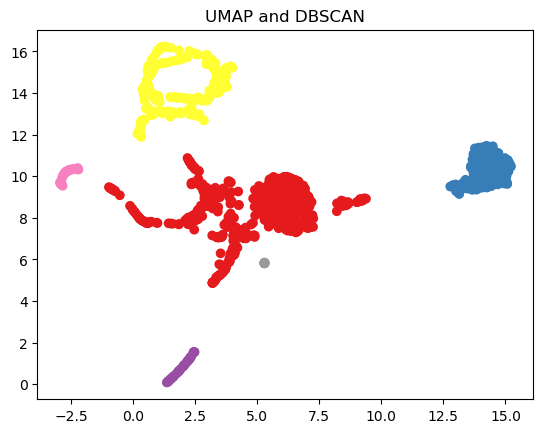

In [36]:
dbscan5 = Clustering.dDBSCAN(ep = 1, min_sample = 1, data = umap)
plt.scatter(umap[:,0], umap[:,1],c=dbscan5.labels_, cmap = "Set1")
plt.title("UMAP and DBSCAN")
plt.show()

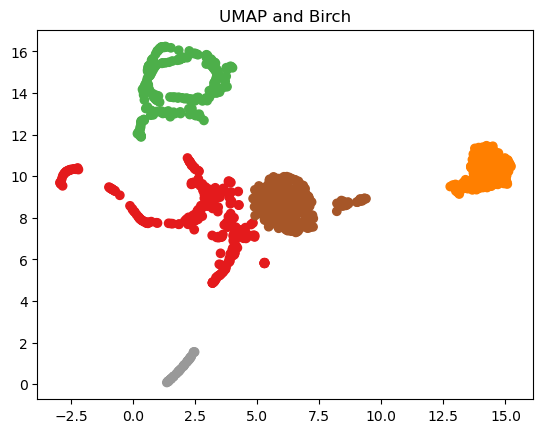

In [39]:
birch2 = Clustering.dBirch(branching_factor = 15, n_clusters = 5, threshold = .5, data = umap)
plt.scatter(umap[:,0], umap[:,1],c=birch2.labels_, cmap = "Set1")
plt.title("UMAP and Birch")
plt.show()

In [42]:
umap_labels = np.array(birch2.labels_)
M,N = np.shape(y_train)
for i in range(M):
    umap_labels[i] = y_train[i,1]
print(umap_labels)

[2 3 2 ... 8 8 2]


Just to get the labels to match up to the ones in the "RawData_Labels" file

NEURAL NETWORK

In [19]:
from source.Model_Builder import ModelBuilder
modelbuilder = ModelBuilder()
ann_model = modelbuilder.ann(X_train=train_scaled, X_test=test_scaled, y_train=y_train[:,1], y_test = y_test[:,1])
modelbuilder.accuracy

0.9974937343358395